In [1]:
import sympy as sp
sp.init_printing()

import numpy as np
from scipy.special import kv, kvp

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
sns.set_style('ticks')
sns.set_context('poster')

In [2]:
(x, y, delta, k_bar, 
 m, epsilon, lambda_bar) = sp.symbols(r'x y \delta \bar{k} m \epsilon \bar{\lambda}')

In [3]:
term1 = (2*k_bar - m*epsilon*lambda_bar)*((delta + 1)*2*k_bar - (delta - 1)*
                                          m*epsilon*lambda_bar)/(k_bar**2 + m**2)
term2 = (epsilon**2 - 1) * lambda_bar**2
term3 = (m*lambda_bar - 2* k_bar)**2/k_bar * (sp.besselk(m, abs(k_bar)) /
                                              sp.besselk(m, x).diff(x).subs(x, abs(k_bar)))

In [4]:
condition = term1 + term2 + term3

In [6]:
print(sp.latex(condition))

\bar{\lambda}^{2} \left(\epsilon^{2} - 1\right) + \frac{1}{\bar{k}^{2} + m^{2}} \left(- \bar{\lambda} \epsilon m + 2 \bar{k}\right) \left(- \bar{\lambda} \epsilon m \left(\delta - 1\right) + \bar{k} \left(2 \delta + 2\right)\right) + \frac{\left(\bar{\lambda} m - 2 \bar{k}\right)^{2} K_{m}\left(\left|{\bar{k}}\right|\right)}{\bar{k} \left(- \frac{1}{2} K_{m - 1}\left(\left|{\bar{k}}\right|\right) - \frac{1}{2} K_{m + 1}\left(\left|{\bar{k}}\right|\right)\right)}


In [6]:
def conditions(k_bar, lambda_bar, epsilon, m, delta):
    term1 = (2*k_bar - m*epsilon*lambda_bar)*((delta + 1)*2*k_bar - 
                                              (delta - 1)*m*epsilon*
                                              lambda_bar)/(k_bar**2 + m**2)
    term2 = (epsilon**2 - 1) * lambda_bar**2
    term3 = (m*lambda_bar - 2* k_bar)**2/k_bar * (kv(m, np.abs(k_bar)) / 
                                                  kvp(m, np.abs(k_bar)))
    return term1 + term2 - term3

In [129]:
conditions(0.6, 1., 0., 1., 0.)

In [7]:
def condition_map(epsilon=0.5, delta=0.):
    fig = plt.figure(figsize=(10,10))
    lambda_bar = np.linspace(0., 3., 750)
    k_bar = np.linspace(0, 1.5, 750)
    lambda_bar_mesh, k_bar_mesh = np.meshgrid(lambda_bar, k_bar) 
    
    stability_kink = conditions(k_bar_mesh, lambda_bar_mesh, epsilon, 1., delta)
    stability_kink = stability_kink < 0
    stability_sausage = conditions(k_bar_mesh, lambda_bar_mesh, epsilon, 0., delta)
    stability_sausage = stability_sausage < 0
    stability_kink = stability_kink.astype(float)
    stability_kink[stability_sausage] = 2

    cmap = colors.ListedColormap([sns.xkcd_rgb["white"], 
                                  sns.xkcd_rgb["yellow"], sns.xkcd_rgb["orange"]])
    plt.contourf(lambda_bar_mesh, k_bar_mesh, stability_kink, 
                 cmap=cmap, levels=[0., 0.5, 1.5, 2.])
    plt.contour(lambda_bar_mesh, k_bar_mesh, stability_kink, 
                levels=[0., 0.5, 1.5, 2.], colors='grey')
    plt.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)
    axes = plt.gca()

    plt.setp(axes.get_xticklabels(), fontsize=40)
    plt.setp(axes.get_yticklabels(), fontsize=40)
    plt.ylabel(r'$\bar{k}$', fontsize=45, rotation='horizontal', labelpad=25)
    plt.xlabel(r'$\bar{\lambda}$', fontsize=45)
    sns.despine()

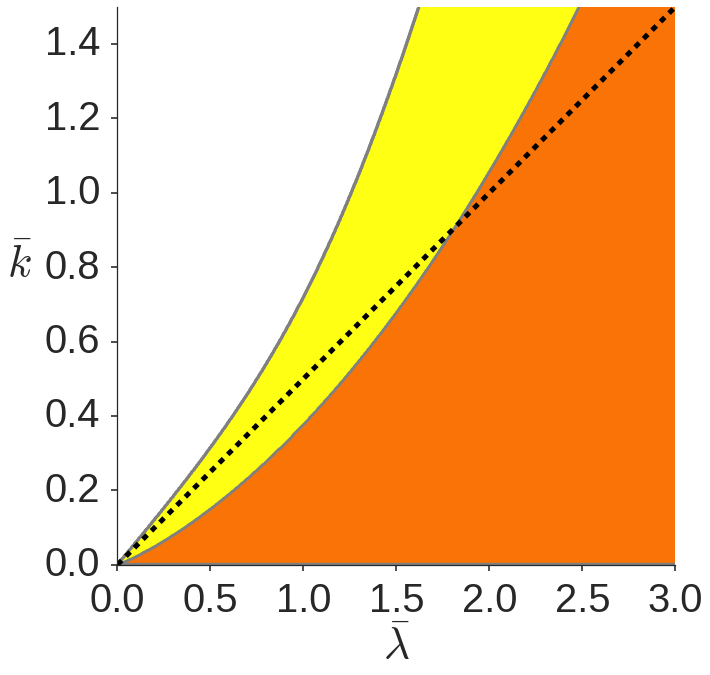

In [19]:
condition_map(epsilon=0.5, delta=-1.)

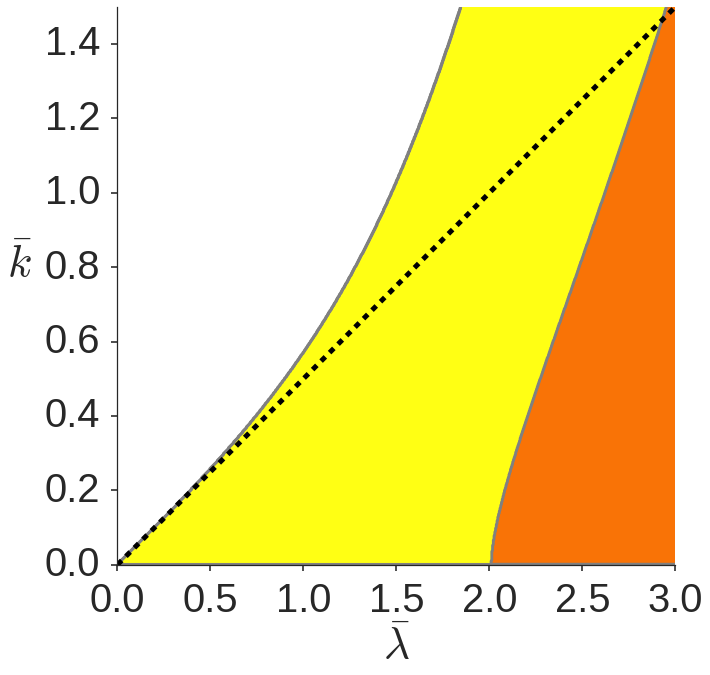

In [16]:
condition_map(epsilon=0.1, delta=0)

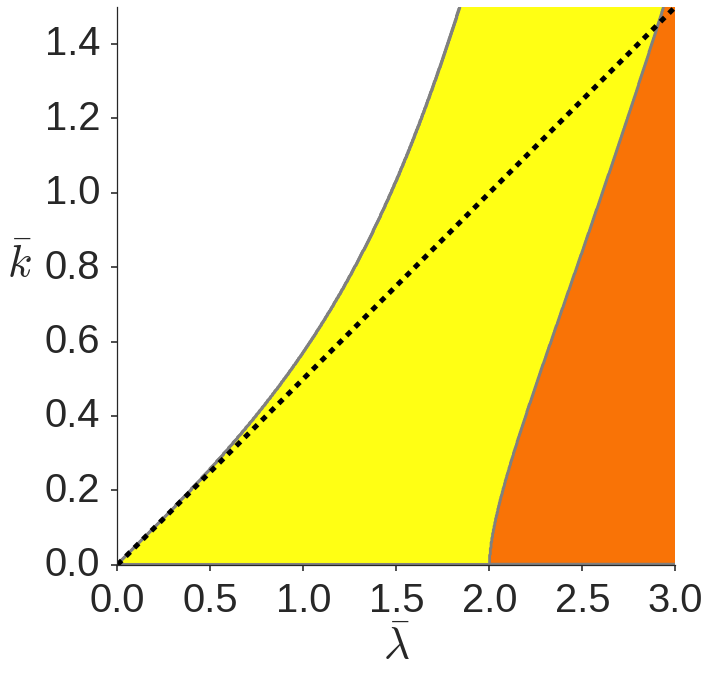

In [14]:
condition_map(epsilon=0., delta=0.)

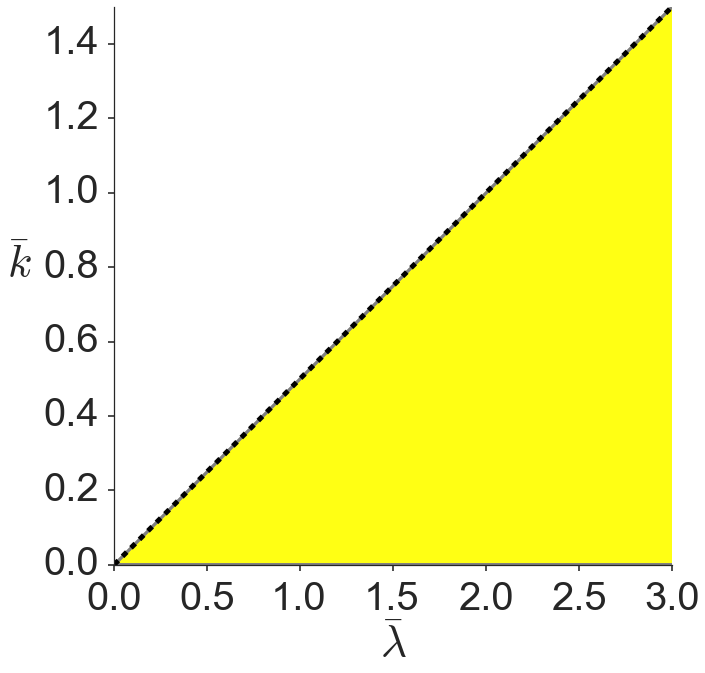

In [164]:
condition_map(epsilon=1., delta=0.)

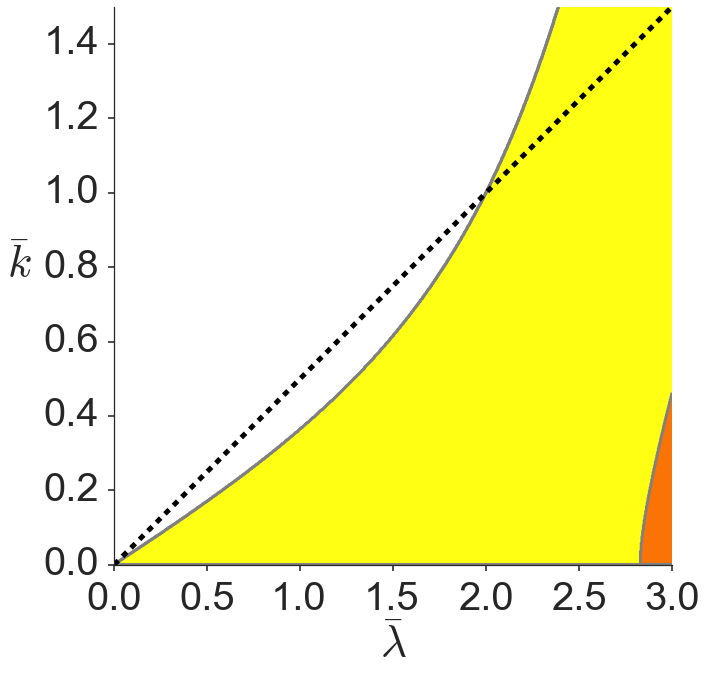

In [165]:
condition_map(epsilon=0., delta=1.)

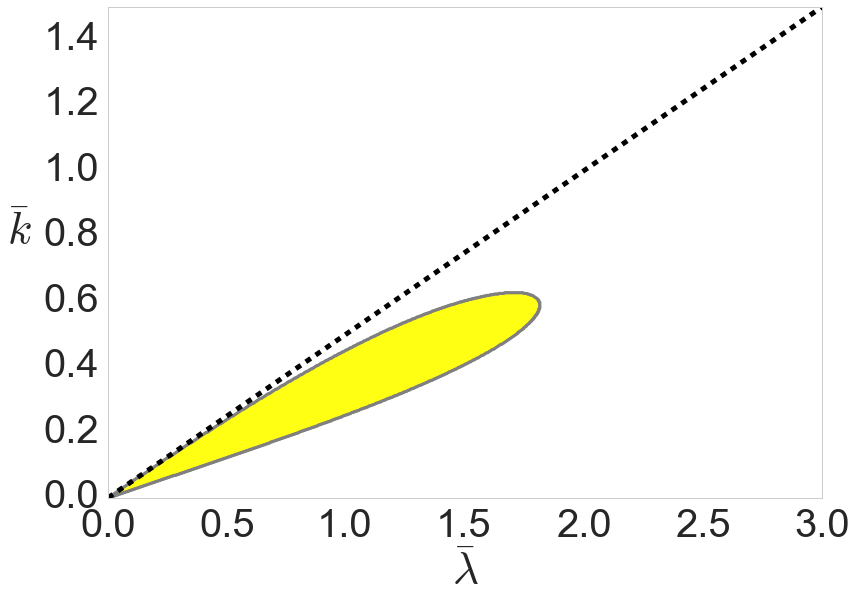

In [137]:
condition_map(1.2, 1.)

In [10]:
def stability_data(epsilon=0., delta=0.):
    lambda_bar = np.linspace(0., 3., 750)
    k_bar = np.linspace(0, 1.5, 750)
    lambda_bar_mesh, k_bar_mesh = np.meshgrid(lambda_bar, k_bar) 
    
    stability_kink = conditions(k_bar_mesh, lambda_bar_mesh, epsilon, 1., delta)
    stability_kink = stability_kink < 0
    stability_sausage = conditions(k_bar_mesh, lambda_bar_mesh, epsilon, 0., delta)
    stability_sausage = stability_sausage < 0
    stability_kink = stability_kink.astype(float)
    stability_kink[stability_sausage] = 2

    return lambda_bar_mesh, k_bar_mesh, stability_kink
    


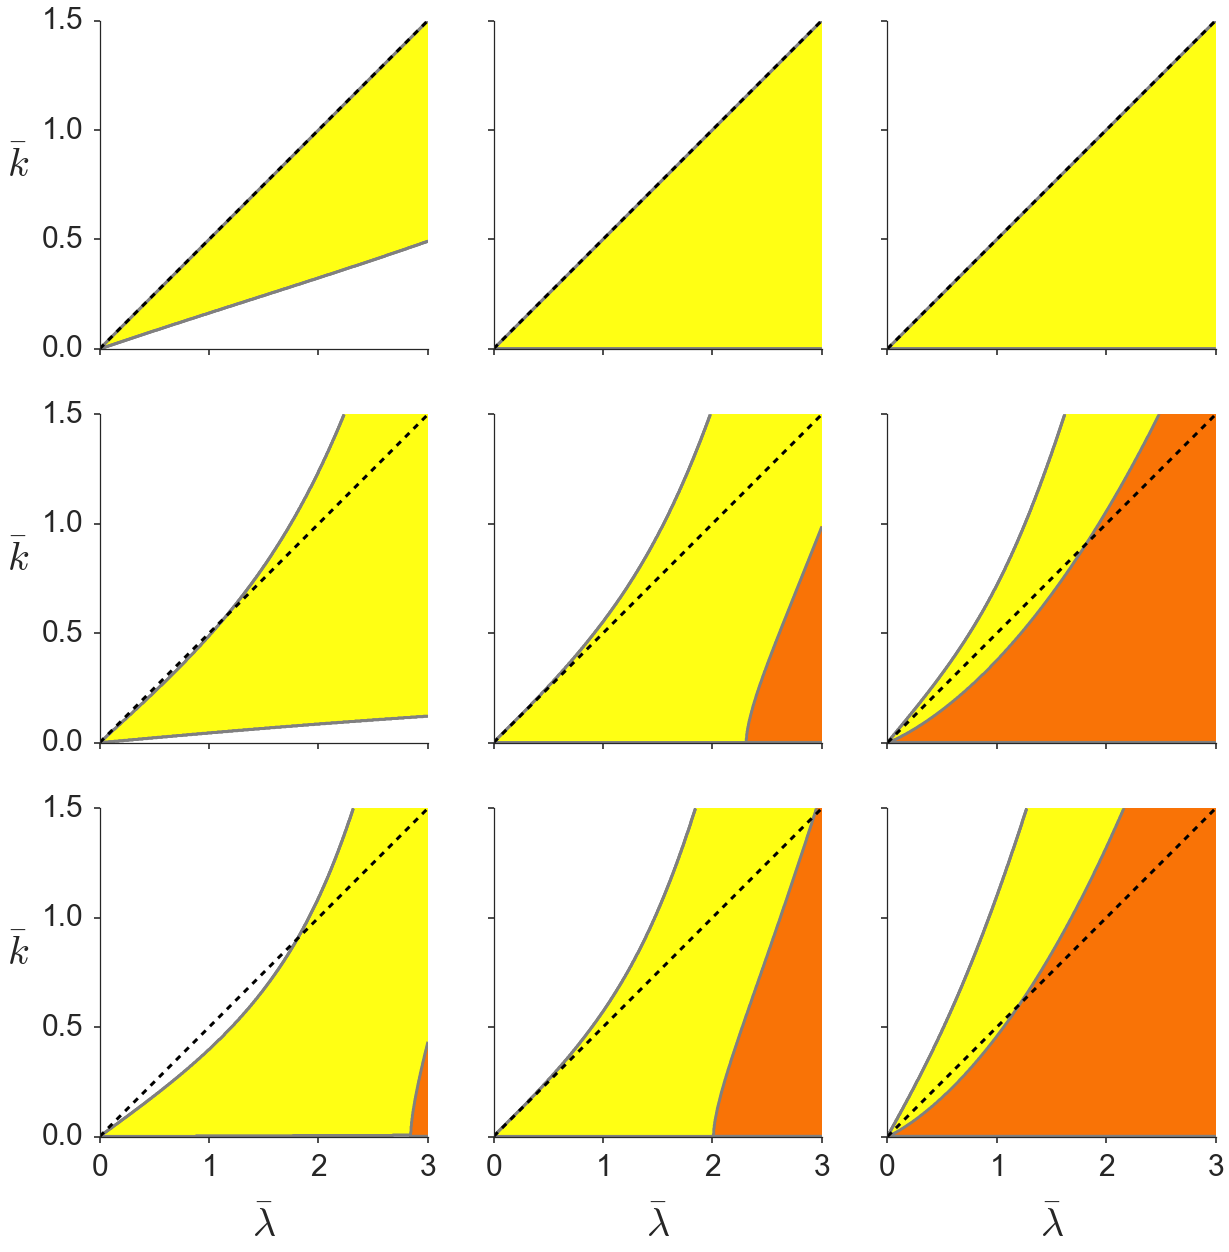

In [11]:
cmap = colors.ListedColormap([sns.xkcd_rgb["white"], sns.xkcd_rgb["yellow"], sns.xkcd_rgb["orange"]])

fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(20,20))

lambda_bar_mesh, k_bar_mesh, stability_kink = stability_data(epsilon=1., delta=1.)
axs[0, 0].contourf(lambda_bar_mesh, k_bar_mesh, 
                   stability_kink, cmap=cmap, levels=[0., 0.5, 1.5, 2.])
axs[0, 0].contour(lambda_bar_mesh, k_bar_mesh, 
                  stability_kink, levels=[0., 0.5, 1.5, 2.], colors='grey')
axs[0, 0].plot([0, 3.], [0., 1.5], '--', c='black', lw=3)
axs[0, 0].set_ylabel(r'$\bar{k}$', fontsize=40, labelpad=25, rotation=0)
plt.setp(axs[0, 0].get_yticklabels(), fontsize=30)
axs[0, 0].set_yticks(np.arange(0., 2.0, 0.5))

lambda_bar_mesh, k_bar_mesh, stability_kink = stability_data(epsilon=0.5, delta=1.)
axs[1, 0].contourf(lambda_bar_mesh, k_bar_mesh, 
                   stability_kink, cmap=cmap, levels=[0., 0.5, 1.5, 2.])
axs[1, 0].contour(lambda_bar_mesh, k_bar_mesh, 
                  stability_kink, levels=[0., 0.5, 1.5, 2.], colors='grey')
axs[1, 0].plot([0, 3.], [0., 1.5], '--', c='black', lw=3)
axs[1, 0].set_ylabel(r'$\bar{k}$', fontsize=40, labelpad=25, rotation=0)
plt.setp(axs[1, 0].get_yticklabels(), fontsize=30)
axs[1, 0].set_yticks(np.arange(0., 2.0, 0.5))

lambda_bar_mesh, k_bar_mesh, stability_kink = stability_data(epsilon=0.1, delta=1.)
axs[2, 0].contourf(lambda_bar_mesh, k_bar_mesh, 
                   stability_kink, cmap=cmap, levels=[0., 0.5, 1.5, 2.])
axs[2, 0].contour(lambda_bar_mesh, k_bar_mesh, 
                  stability_kink, levels=[0., 0.5, 1.5, 2.], colors='grey')
axs[2, 0].plot([0, 3.], [0., 1.5], '--', c='black', lw=3)
axs[2, 0].set_ylabel(r'$\bar{k}$', fontsize=40, labelpad=25, rotation=0)
axs[2, 0].set_xlabel(r'$\bar{\lambda}$', fontsize=40, labelpad=25)
plt.setp(axs[2, 0].get_yticklabels(), fontsize=30)
plt.setp(axs[2, 0].get_xticklabels(), fontsize=30)
axs[2, 0].set_yticks(np.arange(0., 2.0, 0.5))
axs[2, 0].set_xticks(np.arange(0., 3.5, 1.))

lambda_bar_mesh, k_bar_mesh, stability_kink = stability_data(epsilon=1., delta=0.)
axs[0, 1].contourf(lambda_bar_mesh, k_bar_mesh, 
                   stability_kink, cmap=cmap, levels=[0., 0.5, 1.5, 2.])
axs[0, 1].contour(lambda_bar_mesh, k_bar_mesh, 
                  stability_kink, levels=[0., 0.5, 1.5, 2.], colors='grey')
axs[0, 1].plot([0, 3.], [0., 1.5], '--', c='black', lw=3)

lambda_bar_mesh, k_bar_mesh, stability_kink = stability_data(epsilon=0.5, delta=0.)
axs[1, 1].contourf(lambda_bar_mesh, k_bar_mesh, 
                   stability_kink, cmap=cmap, levels=[0., 0.5, 1.5, 2.])
axs[1, 1].contour(lambda_bar_mesh, k_bar_mesh, 
                  stability_kink, levels=[0., 0.5, 1.5, 2.], colors='grey')
axs[1, 1].plot([0, 3.], [0., 1.5], '--', c='black', lw=3)

lambda_bar_mesh, k_bar_mesh, stability_kink = stability_data(epsilon=0.1, delta=0.)
axs[2, 1].contourf(lambda_bar_mesh, k_bar_mesh, 
                   stability_kink, cmap=cmap, levels=[0., 0.5, 1.5, 2.])
axs[2, 1].contour(lambda_bar_mesh, k_bar_mesh, 
                  stability_kink, levels=[0., 0.5, 1.5, 2.], colors='grey')
axs[2, 1].plot([0, 3.], [0., 1.5], '--', c='black', lw=3)
axs[2, 1].set_xlabel(r'$\bar{\lambda}$', fontsize=40, labelpad=25)
plt.setp(axs[2, 1].get_xticklabels(), fontsize=30)
axs[2, 1].set_xticks(np.arange(0., 3.5, 1.))

lambda_bar_mesh, k_bar_mesh, stability_kink = stability_data(epsilon=1., delta=-1.)
axs[0, 2].contourf(lambda_bar_mesh, k_bar_mesh, 
                   stability_kink, cmap=cmap, levels=[0., 0.5, 1.5, 2.])
axs[0, 2].contour(lambda_bar_mesh, k_bar_mesh, 
                  stability_kink, levels=[0., 0.5, 1.5, 2.], colors='grey')
axs[0, 2].plot([0, 3.], [0., 1.5], '--', c='black', lw=3)

lambda_bar_mesh, k_bar_mesh, stability_kink = stability_data(epsilon=0.5, delta=-1.)
axs[1, 2].contourf(lambda_bar_mesh, k_bar_mesh,
                   stability_kink, cmap=cmap, levels=[0., 0.5, 1.5, 2.])
axs[1, 2].contour(lambda_bar_mesh, k_bar_mesh, 
                  stability_kink, levels=[0., 0.5, 1.5, 2.], colors='grey')
axs[1, 2].plot([0, 3.], [0., 1.5], '--', c='black', lw=3)

lambda_bar_mesh, k_bar_mesh, stability_kink = stability_data(epsilon=0.1, delta=-1.)
axs[2, 2].contourf(lambda_bar_mesh, k_bar_mesh, 
                   stability_kink, cmap=cmap, levels=[0., 0.5, 1.5, 2.])
axs[2, 2].contour(lambda_bar_mesh, k_bar_mesh, 
                  stability_kink, levels=[0., 0.5, 1.5, 2.], colors='grey')
axs[2, 2].plot([0, 3.], [0., 1.5], '--', c='black', lw=3)
axs[2, 2].set_xlabel(r'$\bar{\lambda}$', fontsize=40, labelpad=25)
plt.setp(axs[2, 2].get_xticklabels(), fontsize=30)
axs[2, 2].set_xticks(np.arange(0., 3.5, 1.))

sns.despine()

plt.show()